<a href="https://colab.research.google.com/github/Luo2090411/ML/blob/main/comp88_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP0088 Lab Assignment 1



## Introduction

This first lab assignment may be considered something of a warm-up exercise. It is an opportunity to get to grips with working in the Colab environment and get acquainted with some basic data generation and plotting. None of the tasks involve any actual **machine learning**, but they do introduce some models and mechanisms that will be extremely important in the weeks ahead.

For each task, you are asked to write the code for some functions. The function interface is defined -- please do not change this -- and you are told what it should do. At the end of each task is a code cell that calls the functions and produces some results, usually in the form of plots. Some examples of what the completed plots might look like are shown below. Your outputs do not need to look exactly like these, but they will probably have the same general form. (In future lab assignments the plotting functions will often be provided for you, but in this introductory exercise you are asked to do the plotting yourself and can style it however you like.)

![example of completed plots](https://comp0088.github.io/assets/colab/week_1_small.jpg)

If you already have experience using NumPy and Matplotlib, especially in the context of ML, you may find some of the exercises trivial. If so, there are suggestions of further things to try in the **Further Exploration** section.

Conversely, if you do not have any such experience, the exercises may be a bit daunting. Don't worry if some of the concepts seem strange and unfamiliar at this point. We'll go into linear models at length in week 2, and return to them frequently all the way through the module. For now, just try to understand the basic ideas. If you have problems, feel free to ask the tutors for help.

Before we get to the actual tasks there are some subsections below introducing Colab and the notebook format and demonstrating some basic plotting. Feel free to skip over the **Using Colab** and **Basic Plotting** sections if you're already comfortable with those things, but please make sure to run all the code cells in the **Setting Up** section -- these import things that will be needed for the rest of the assignment.

There are some potentially helpful utility functions in the `utils` module that gets downloaded and imported in **Setting Up**. You don't have to make use of these, but it is probably worth having a look at them, as they can help avoid some tedious mucking about with things like array axis ordering.

**Note:** A couple of this week's exercises can be reduced to one-liners with judicious use of `utils`, but the resulting code is rather cryptic. You'll probably find it helpful to code things in more explicit steps to begin with. (This week's example solutions will do things both ways.)


## Using Colab

Google Colaboratory provides free access to computational resources via a web-based front end known as a **notebook**. There are pros and cons to this approach, but it does have the virtue of providing a consistent software environment for everyone without having to wrestle with installation and configuration woes on dozens of different, subtly-incompatible laptops.

The notebook content is broken down into **cells**, of which there are two basic types:
* **Text** cells (like this one) contain rich text and possibly other media such as images. You should **read** the content of these cells!
* **Code** cells (like the one below) contain program instructions in Python, and sometimes other operating system commands. The latter are typically prefixed by an exclamation mark, like this: `!ls -l`
   
   Code content can be executed on the remote **virtual machine** by clicking on the **play**  ( ▶︎ ) button that appears in the top left hand corner of the cell when you move your cursor over it. Some code may take a while to run — the play button will change to a **stop** (◾️) button, and an animated progress wheel will show around it. As the code runs, it may produce output, which will appear at the bottom of the cell. You can click the stop button to halt the execution.

  (The notebook must be **connected** to a virtual machine in order to run code cells. This should happen automatically the first time you attempt to execute a cell — there will be a delay while this takes place.)

Try clicking the play button on the cell below to run it.

In [469]:
# a very simple example of a code cell
# running the cell will execute the statement below and generate output
print('hello world!')

hello world!


There are two important caveats to be aware of, one to do with the Jupyter notebook interface and the other to do with Colab:

1. The notebook interface allows **out of order execution** of code cells. That is, it is possible to run later cells before earlier ones. This is really **never what you want** and can give rise to all kinds of problems with inconsistent state. Always be sure to run cells in order. If you need to go back and re-run earlier cells (eg, because you want to change something) always follow that up by re-running all the subsequent cells in order too, to make sure everything is consistent.

2. The virtual machine environment that Colab runs behind this notebook interface is **resource-limited** and **transient**. If you don't do anything for awhile, the notebook may disconnect from the virtual machine. If you use too much computation then your session may be halted — and what qualifies as "too much" is kept intentionally vague. VMs are purged daily: if you stop and come back to it tomorrow the VM will have been deleted and you will need to go back to the beginning and go through the setup steps again. If you generate something that you want to keep, you should download it to your local machine.


## Setting Up

This notebook makes use of the NumPy library for numerical computing and the Matplotlib library for plotting. These are both extremely standard and are installed by default on your Colab instance. We just need to tell the Python interpreter we want to use them:

In [470]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# this is probably the default, but just in case
%matplotlib inline

We're also going to bring in some shared COMP0088 lab code from the module GitHub:

In [471]:
# load lab code and resources
!git clone https://github.com/comp0088/shared.git comp0088

# at the moment this is all we care about
import comp0088.utils as utils

fatal: destination path 'comp0088' already exists and is not an empty directory.


In [472]:
# finally, set up some items for use in later code
shared_rng = numpy.random.default_rng()

WEIGHTS = np.array([0.5, -0.4, 0.6])
LIMITS = (-5, 5)

def test_func(X):
    """
    Simple example function of 2 variables for
    testing grid & random optimisation.
    """
    return (X[..., 0]-1)**2 + X[...,1]**2 + 2 * np.abs((X[...,0]-1) * X[...,1])

## Basic Plotting

The [Matplotlib](https://matplotlib.org) library provides extensive plotting capabilities,
originally modelled on those in Matlab. The library is big and
complicated, and though there is [extensive documentation online](https://matplotlib.org/stable/users/) it can be quite daunting at first.

Here we provide a few simple example plots that you can use as
starting points for some of the visualisations in the lab
assignments. They are not intended to be exhaustive, nor to be
perfect exemplars of best practice. If you are already familiar
with Matplotlib or just want to dig into it on your own, feel free
to ignore these examples.

It is pretty common practice, especially in a notebook environment and when doing exploratory data analysis, to use the "implicit" `pyplot` API for plotting. This does some behind the scenes object management for you, effectively maintaining global objects representing the current figure and graph axes. This API is slightly more succinct, allowing concise plotting commands like this:

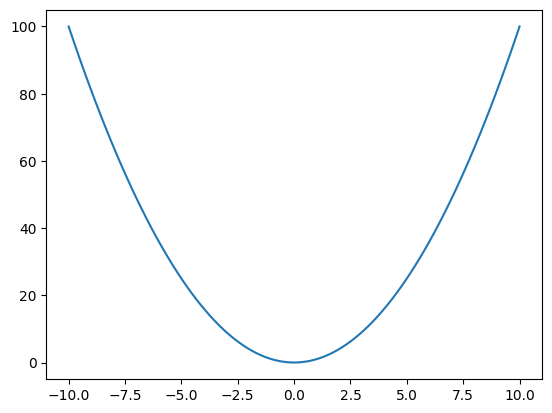

In [473]:
# create some simple data to plot
xx = np.linspace(-10,10,100)
yy = xx * xx

# plot it using the implicit pyplot API
plt.plot(xx, yy);

However, the downside of this API is that it is less transparent and also less flexible. Here we will instead use the "explicit" (also referred to as the "object oriented") API, where we create and manage figures and axes ourselves. This is a little bit more verbose, but allows us more control and is a bit more upfront about what is being done.

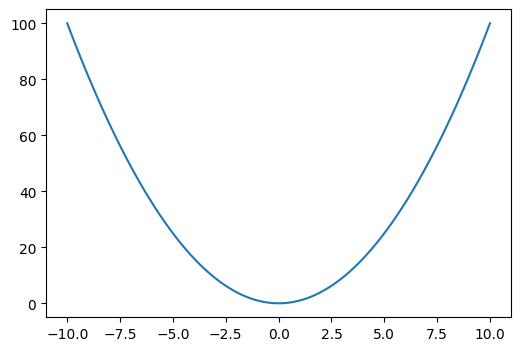

In [474]:
# explicitly create a figure object and graph axes with in it
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots()

# plot the same data as before using the explicit API
ax.plot(xx, yy);

In this very simple example there's not a whole lot of difference between the two approaches, but for more complex plots the explicit API is more versatile. For more on the differences between these APIs, see [this documentation page](https://matplotlib.org/stable/users/explain/api_interfaces.html).

### Line & Scatter Plots

The [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) method produces a generic 2D line and/or scatter plot, with graphical details such as colour and marker specified as additional parameters. We can call it multiple times to add additional content to a plot, and can also use further methods on the Axes object to add things like axis labels and a legend, as in the example below.

For more complex scatter plots, eg with variable marker size, there is also the [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) method.

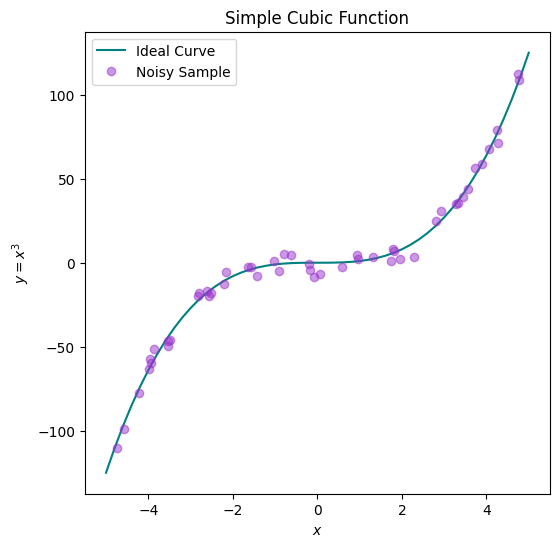

In [475]:
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# generate a noiseless ideal cubic curve
xx = np.linspace(-5, 5, 51)
yy = xx * xx * xx

ax.plot(xx, yy, color='teal', marker='', linestyle='-', label='Ideal Curve')

# generate some noisy sample points
xx = shared_rng.random(50) * 10 - 5
yy = xx * xx * xx + shared_rng.normal(scale=4, size=50)

ax.plot(xx, yy, color='darkorchid', marker='o', linestyle='', label='Noisy Sample', alpha=0.5)

# you can use (some) LaTeX formatting in text labels
ax.set_xlabel('$x$')
ax.set_ylabel('$y = x^3$')

ax.set_title('Simple Cubic Function')

# add a legend
# by default this includes whatever we have provide a label for above
ax.legend();


### Histograms

We'll often want to visualise the *distribution* of data. A very common tool for this is a [histogram](https://en.wikipedia.org/wiki/Histogram), which we can plot using the [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) method.

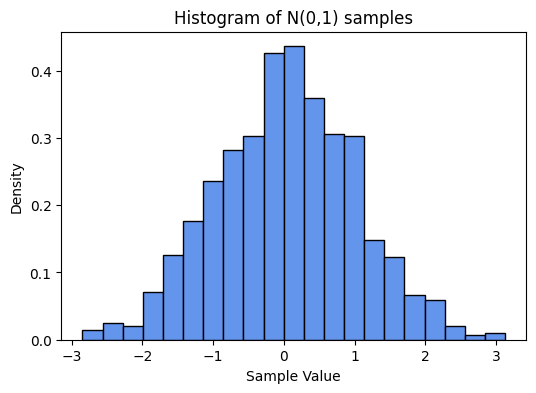

In [476]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots()

# generate some univariate Gaussian data
xx = shared_rng.normal(size=1000)

# plot as a density histogram (ie, area sums to 1)
ax.hist(xx, bins=21, density=True, color='cornflowerblue', edgecolor='black')

ax.set_xlabel('Sample Value')
ax.set_ylabel('Density')
ax.set_title('Histogram of N(0,1) samples');

### 3D Data

We will often have to deal with data with more than two dimensions. Visualising higher dimensional data in general can be very difficult, but for 3D we have some decent options. Two common approaches are to use colour or intensity to represent the third dimension, or to use some form of 3D projection. We will illustrate both approaches below.

For simplicity we'll consider data with two **independent variables** $x$ and $y$, and a single **dependent variable** $z$ that is a function of those variables:

$$z = f(x, y) = \cos((x-1)^2 + (y+0.5)^2)$$

We can sample many different values of $x$ and $y$ and calculate $z$ for each one. One common sampling strategy uses the NumPy functions [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to sample all points on a grid.

In [477]:
x = np.linspace(-2.5, 2.5, 100)
y = np.linspace(-1.5, 1.5, 100)

xx, yy = np.meshgrid(x, y)
zz = np.cos((xx-1)*(xx-1) + (yy+0.5)*(yy+0.5))

Using colour to display the value of $z$ at every point on a regular $(x,y)$ grid is exactly equivalent to displaying an **image**, which can be done in Matplotlib using the [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) method.

By default, `imshow` just uses the pixel dimensions of the image for the axis dimension, and it displays the image from the top downwards, which is how images are normally stored. However, in this case we want to specify the **extents** -- the value ranges across and down -- so that they match up with out $(x,y)$ values, and we also want to have the origin at the bottom, because it's standard for graphs to have $y$ increase upwards. So we add some extra options to our `imshow` call.

In addition, we're going to add some contour lines -- partly because they help make the gradients a little bit clearer, but mostly for decorative effect.

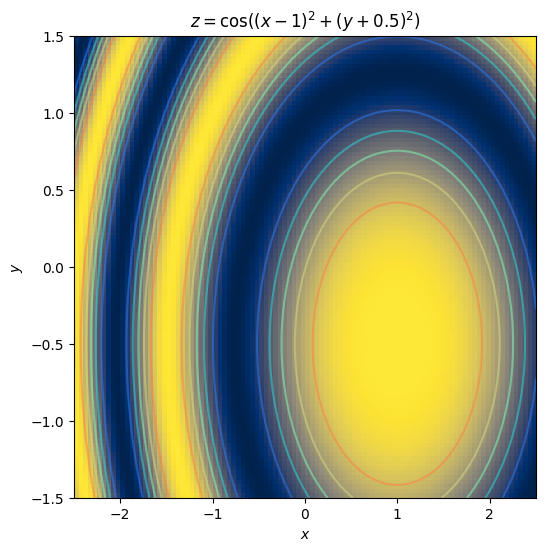

In [478]:
# calculate the coordinate range and aspect ratio
extent = (np.min(xx), np.max(xx), np.min(yy), np.max(yy))
aspect = (extent[1] - extent[0])/(extent[3] - extent[2])

fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

ax.imshow(zz, cmap='cividis', origin='lower', extent=extent, aspect=aspect)

# add some contour lines
levels = np.linspace(np.min(zz), np.max(zz), 7)
ax.contour(xx, yy, zz, levels, cmap='rainbow', origin='lower', extent=extent, alpha=0.5 )

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$z = \\cos((x-1)^2 + (y+0.5)^2)$');



Alternatively, we can render the data as a **surface** within a projected 3D space, using the [`plot_surface`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html) method.

(Note that this requires a different kind of Axes object -- [Axes3D](https://matplotlib.org/stable/api/toolkits/mplot3d/axes3d.html) -- which in turn means that rather than the shorthand [`Figure.subplots`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplots) method used previously, we'll instead use the slightly different [`Figure.add_subplot`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot) interface. This is the sort of fiddly detail that can make Matplotlib daunting, but don't worry about it too much. We'll mostly stick to 2D plotting in this module.)

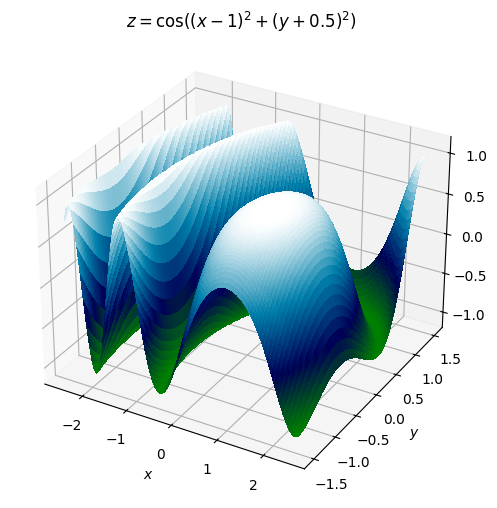

In [479]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface( xx, yy, zz, rcount=100, ccount=100, cmap='ocean', antialiased=False, linewidth=0 )
ax.set_zlim(-1.2, 1.2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('$z = \\cos((x-1)^2 + (y+0.5)^2)$');

# Task 1: Generating linear continuous data

A continuous **linear model** is one whose output is just a weighted sum of the input features:

$$y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_d x_d = \sum_{i=0}^d w_i x_i$$

where we've defined a constant dummy feature $x_0 = 1$ to capture the intercept term $w_0$ in the sum. We can express this concisely in vector form:

$$y = \mathbf{w \cdot x \quad\quad w},\mathbf{x} \in \mathbb{R}^{d+1}$$

This is a *deterministic* model, fully parameterised by the weight vector $\mathbf{w}$. In practice we might expect there to be some amount of measurement error or other uncertainty in the values we obtain for $y$. One way to represent this uncertainty is with an additive error term, $\varepsilon$:

$$y = \mathbf{w \cdot x} + \varepsilon$$

This is not the only way to model the uncertainty, or necessarily the best, but it is nice and simple and very commonly used. In the absence of other information about $\varepsilon$, we will often further assume that it follows a Gaussian distribution with mean zero (since the location is already modelled by $w_0$) and standard deviation $\sigma$:

$$\varepsilon \sim N(0, \sigma^2)$$

Given $\mathbf{w}$ and $\sigma$, we can the generate any number of samples $(\mathbf{x},y)$ from this model by choosing values for $\mathbf{x}$.

## 1.1 Generate samples from a linear model with additive Gaussian noise

Implement the body of the `generate_noisy_linear` function in the cell below.

Note the following:

* The function arguments `weights` and `sigma` correspond to $\mathbf{w}$ and $\sigma$ in the equations given above.
* `weights[0]` is the intercept term $w_0$. Hence, the number of features, $d$, is *one less* than the length of `weights`.
* Use the supplied generator `rng` to obtain random numbers. The Generator class is documented [here](https://numpy.org/doc/stable/reference/random/generator.html), but probably the most immediately relevant methods are [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html), [uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html) and [normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html).

**IMPORTANT**: Here and in all subsequent tasks, whenever you make changes to the code you must **run the cell again** to propagate your updates to the runtime environment.

In [480]:
def generate_noisy_linear(num_samples, weights, sigma, limits, rng):
    """
    Draw samples from a linear model with additive Gaussian noise.

    # Arguments
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the model
            (including a bias term at index 0)
        sigma: standard deviation of the additive noise
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        X: a matrix of sample inputs, where
            the samples are the rows and the
            features are the columns
            ie, its size should be:
              num_samples x (len(weights) - 1)
        y: a vector of num_samples output values
    """

    # TODO: implement this
    w = np.array(weights)
    d = (len(weights) - 1)
    low = limits[0]
    high = limits[1]

    X = rng.uniform(low=low, high=high, size=(num_samples, d))

    liner = w[0] + X @ w[1:]


    noise = rng.normal(loc=0.0, scale=sigma, size=num_samples)

    y = liner + noise


    return X, y


## 1.2 Plot a 1D linear model

Complete the implementation of the `plot_noisy_linear_1d` function below. Note that the function generates the data to plot by calling the function you implemented in part 1.1. You may find it useful to refer to the example in the [Line & Scatter Plots](#scrollTo=29sz50HEN_jx) subsection above.

In [481]:
def plot_noisy_linear_1d(axes, num_samples, weights, sigma, limits, rng):
    """
    Generate and plot points from a noisy single-feature linear model,
    along with a line showing the true (noiseless) relationship.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the model
            (including a bias term at index 0)
        sigma: standard deviation of the additive noise
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        None
    """
    assert(len(weights)==2)
    X, y = generate_noisy_linear(num_samples, weights, sigma, limits, rng)

    # TODO: remove the following line and do the plotting


    axes.plot(X[:,0], y, color='darkorchid', marker='o', linestyle='', label='Noisy Sample', alpha=0.5)


    x_line = np.linspace(limits[0], limits[1], num_samples)
    y_line = weights[0] + weights[1] * x_line

    axes.plot(x_line, y_line, color="red", label="True line")











    utils.plot_unimplemented ( axes, 'Noisy 1D Linear Model' )

## 1.3 Plot a 2D linear model

Complete the implementation of the `plot_noisy_linear_2d` function below.

While this problem is similar to the previous one, note that this model is significantly harder to visualise because there are three dimensions of data to consider: two inputs and one output. To make matters worse, the Axes object you are passed in the first argument is only a 2d Cartesian one, not a 3d projection. So you'll need to consider how to represent it and that may affect what data you need to generate. (The [3D Data](#scrollTo=B_MI6GIuWBwr) example might be helpful here.)

In [482]:
def plot_noisy_linear_2d(axes, resolution, weights, sigma, limits, rng):
    """
    Produce a plot illustrating a noisy two-feature linear model.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        resolution: how densely should the model be sampled?
        weights: vector defining the model
            (including a bias term at index 0)
        sigma: standard deviation of the additive noise
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        None
    """
    assert(len(weights)==3)

    # TODO: generate the data
    # TODO: remove the following line and do the plotting


    w0 = weights[0]
    w1 = weights[1]
    w2 = weights[2]

    low = limits[0]
    high = limits[1]

    x1 = np.linspace(low, high, resolution)
    x2 = np.linspace(low, high, resolution)

    X1,X2 = np.meshgrid(x1, x2)

    Y = w0 + w1 * X1 + w2 * X2

    cs = axes.contourf(X1, X2, Y, levels=20, alpha=0.7)

    axes.figure.colorbar(cs, axes, label="True y (noiseless)")

    Xs, ys = generate_noisy_linear(resolution, weights, sigma, limits, rng)

    sc = axes.scatter(Xs[:,0], Xs[:,1], c=ys, s=18, alpha=0.85)
    axes.figure.colorbar(sc, axes, label="Noisy")



    utils.plot_unimplemented ( axes, 'Noisy 2D Linear Model' )

## → Run Task 1

Execute the code cell below to run the previous tasks and generate a pair of plots.

(BTW, if you found yourself wondering earlier why there are separate objects for figure and axes, this might help clarify that.)

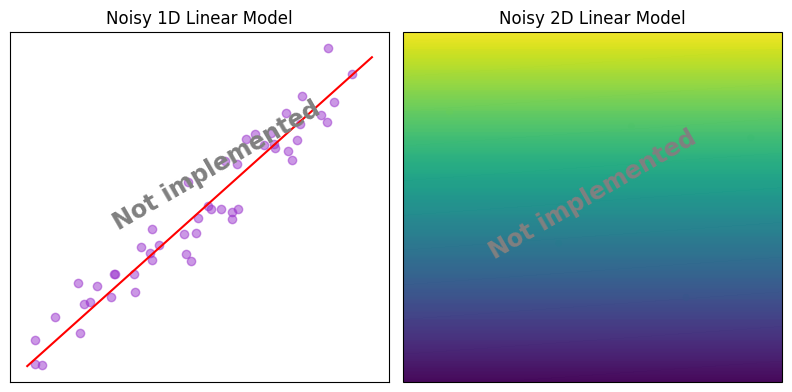

In [483]:
fig = plt.figure(figsize=(8, 4))
axs = fig.subplots(ncols=2)

plot_noisy_linear_1d(axs[0], 50, WEIGHTS[1:], 0.5, LIMITS, shared_rng)
plot_noisy_linear_2d(axs[1], 100, WEIGHTS, 0.2, LIMITS, shared_rng)
fig.tight_layout(pad=1)

# Task 2: Generating linearly separable binary data

We can use an equation akin to the model in Task 1 to define a linear boundary -- or **separating
hyperplane** -- that divides a feature space into disjoint half-spaces:

$$\mathbf{w \cdot x} = 0$$

In a **binary classification** problem, if there exists at least one such hyperplane for which all samples of class 0 are on one side and all those of class 1 are on the other, then the data are said to be **linearly separable**, and we can define a classifier using the hyperplane as a decision boundary:

\begin{equation*}
y = \begin{cases}
	1 & \text{if $\mathbf{w \cdot x} \ge 0$}\\
	0 & \text{otherwise}
     \end{cases}
\end{equation*}

Putting aside the question of how to *find* such a plane, or whether it makes a *good* classifier, we can see that (as with the continuous case in Task 1) it is easy to generate samples $(\mathbf{x}, y)$ given $\mathbf{w}$.



## 2.1 Generate sample data with binary labels that are linearly separable in a continuous feature space

Implement the `generate_linearly_separable` function below.

(The notes from Task 1.1 also apply here.)

In [484]:
def generate_linearly_separable(num_samples, weights, limits, rng):
    """
    Draw samples from a binary model with a given linear
    decision boundary.

    # Arguments
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the decision boundary
            (including a bias term at index 0)
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        X: a matrix of sample vectors, where
            the samples are the rows and the
            features are the columns
            ie, its size should be:
              num_samples x (len(weights) - 1)
        y: a vector of num_samples binary labels
    """
    # TODO: implement this

    w = np.array(weights)
    d = (len(weights) - 1)
    low = limits[0]
    high = limits[1]

    X = rng.uniform(low, high, (num_samples, d))

    D = w[0] + X @ w[1:]

    for i in range(num_samples):
        if D[i] >= 0:
            y[i] = 1
        else:
            y[i] = 0




    return X, y

## 2.2 Plot a set of labelled 2D samples and their boundary line

Complete the implementation of the function `plot_linearly_separable_2d` below. As in 1.2, the call to generate the data using the function above is provided, all you need to do is plot it.

Aim to include most or all of the following features in your plot:

* All the generated samples, with their class clearly indicated (eg, by colour and shape).
* A line marking the decision boundary. You will need to calculate the end points (or other defining parameters such as gradient and intercept) from the weights vector. Consider how to do this -- are there any edge cases you need to take into account.
* An [arrow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html) to show the weight vector itself.

Verify that the weight vector is normal to the boundary and points towards the positive class.

In [485]:
def plot_linearly_separable_2d(axes, num_samples, weights, limits, rng):
    """
    Plot a linearly separable binary data set in a 2d feature space.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the decision boundary
            (including a bias term at index 0)
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        None
    """
    assert(len(weights)==3)
    X, y = generate_linearly_separable(num_samples, weights, limits, rng)

    # TODO: do the plotting

    w0 = weights[0]
    w1 = weights[1]
    w2 = weights[2]

    low = limits[0]
    high = limits[1]



    axes.plot(X[y==1, 0], X[y==1, 1], 'bo', label="class 1", alpha=0.7)
    axes.plot(X[y==0, 0], X[y==0, 1], 'bo', label="class 0", alpha=0.7)



















    utils.plot_unimplemented ( axes, 'Linearly Separable Binary Data' )

## → Run Task 2

Execute the code cell below to run the function you wrote above and generate a plot.

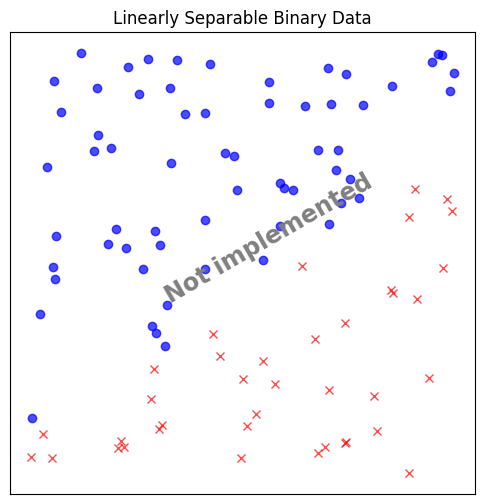

In [486]:
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

plot_linearly_separable_2d(ax, num_samples=100, weights=WEIGHTS, limits=LIMITS, rng=shared_rng)

# Task 3: Searching for the minimiser of a function

In Lecture 1.3 we introduced the notation

$$\text{argmin}_x f(x)$$

to denote the problem of finding the value of the input $x$ that minimises the output of $f$. In general this problem may be arbitrarily difficult, since $f$ could be anything.

The NumPy library includes a function of the same name, [`argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html), which addresses a much more limited (and tractable) task: it finds the location of the smallest value in an array. Despite its simplicity, this can sometimes be enough to find the exact minimiser (if $x$ can only take on a few discrete values) or at least to find an approximate one by **sampling**.

Let $\mathbf{x}$ be a vector of sampled inputs $[ x_1, x_2, ..., x_n ]$ and $\mathbf{y}$ the vector of corresponding outputs $[ f(x_1), f(x_2), ..., f(x_n) ]$. If $j = $ `argmin(` $\mathbf{y}$ `)` (in the NumPy sense), then $x_j$ is (of the available choices) our best estimate of $\text{argmin}_x f(x)$.

There are various possible ways to choose candidate values of $x$, but here we'll look at two common ones: either randomly or at regular intervals.

## 3.1 Perform a random search for the minimum value of a function

Provide an implementation body for the `random_search` function defined in the cell below.

Some points to note:

* Here (and below, and in future assignments) we make use of the ability to pass one function to another as an argument. To execute the function passed in as the argument `function` on some array `X` you can just call it like any other function:
  ```
  y = function(X)
  ```
* The return value should be just a single feature vector: all other samples are discarded.

In [487]:
def random_search(function, count, num_samples, limits, rng):
    """
    Randomly sample from a function of `count` features and return
    the best feature vector found.

    # Arguments
        function: a function taking a single input array of
            shape (..., count), where the last dimension
            indexes the features
        count: the number of features expected by the function
        num_samples: the number of samples to generate & search
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        x: a vector of length count, containing the found features
    """

    # TODO: implement this
    return None

## 3.2 Perform a grid search for the minimum value of a function

Provide an implementation for the `grid_search` function in the cell below.

A common NumPy idiom for grid sampling (inherited from Matlab) employs [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to generate evenly spaced values and combine dimensions respectively. An example of this usage can be found in `utils.make_grid`. You may find it more convenient to use this function, since it also conforms the results to our feature indexing convention. (As ever, you don't have to, and solutions will be provided both ways.)

How does the computational complexity of `grid_search` scale with the number of features? What does that suggest about its potential applicability?


In [488]:
def grid_search(function, count, num_divisions, limits):
    """
    Perform a grid search for a function of `count` features and
    return the best feature vector found.

    # Arguments
        function: a function taking a single input array of
            shape (..., count), where the last dimension
            indexes the features
        count: the number of features expected by the function
        num_divisions: the number of samples along each feature
            dimension (including endpoints)
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i

    # Returns
        x: a vector of length count, containing the found features
    """

    # TODO: implement this
    return None

## 3.3. Plot a 2D function along with minimum values found by grid and random searching

Provide an implementation for the `plot_searches_2d` function in the cell below.

Use the functions defined in the previous sections to perform the grid and random searches.

Try to include most or all of the following features:

* An **image** (of size `resolution` × `resolution` pixels) showing the output values of the function over its full range in both feature dimensions, with the output value represented by colour. Generating this will require similar steps to those in your grid search, but you will need all the returned function values rather than the minimum feature vector. (You may find the `imshow` example in the [3D Data](#scrollTo=B_MI6GIuWBwr) section helpful here.)
* A marker indicating the minimum point found by a random search.
* A marker indicating the minimum point found by a grid search.
* If `true_min` is provided, a marker showing the real function minimum.



In [489]:
def plot_searches_2d(axes, function, limits, resolution,
                     num_divisions, num_samples, rng, true_min=None):
    """
    Plot a 2D function aling with minimum values found by
    grid and random searching.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        function: a function taking a single input array of
            shape (..., 2), where the last dimension
            indexes the features
        limits: a tuple (low, high) specifying the value
            range of both input features x1 and x2
        resolution: number of samples along each side
            (including endpoints) for an image representation
            of the function
        num_divisions: the number of samples along each side
            (including endpoints) for a grid search for
            the function minimum
        num_samples: number of samples to draw for a random
            search for the function minimum
        rng: an instance of numpy.random.Generator
            from which to draw random numbers
        true_min: an optional (x1, x2) tuple specifying
            the location of the actual function minimum

    # Returns
        None
    """

    # TODO: implement this
    utils.plot_unimplemented ( axes, 'Sampling Search' )

## → Run Task 3

Execute the code cell below to run the function you wrote in the previous cell and produce the plot.


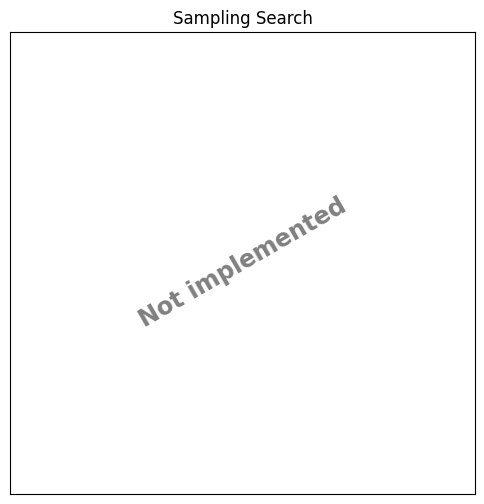

In [490]:
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

plot_searches_2d(ax, test_func, limits=LIMITS, resolution=100, num_divisions=10,
                 num_samples=100, rng=shared_rng, true_min=(1,0))

This code uses the following function as a test case:

\begin{equation}
y = (x_1 - 1)^2 + x_2^2 + \big| 2 (x_1 - 1) x_2 \big|
\end{equation}

It can be seen by inspection that this function has its minimum at $(1, 0)$, and this value is passed as `true_min`. How does this compare to the values discovered by the grid and random searches? How consistent is that if you re-run the test several times? Looking at the parameters with which the script calls `plot_searches_2d`, how might you estimate the probability that random search outperforms grid search here?


# Further exploration

If you have exhausted the previous exercises, you might find it interesting to try out one or more of the following challenges. Doing so is entirely optional, but may provide some additional perspective that could be useful in the weeks ahead.

Note that no code cells or outline code are provided for these, you'll need to do it all yourself. But the `utils` module includes a function `plot_classification_map` (which we'll be using in future weeks) that you may find useful for visualising decision boundaries.


## Plot the 2D models from tasks 1.3 and 3.3 in 3D projection

For simplicity, in the exercises above we plotted the models above (with 2 input dimensions and 1 output) as flat images, using colour to represent the third dimension. Using a 3D projection can sometimes be more intuitive. Try plotting those models in such a projection.

Note that Matplotlib uses a different Axes class for 3D plots, so you will need to specify `projection='3d'` when adding the axes object to your figure. See [3D Data](#scrollTo=B_MI6GIuWBwr) section for an example of this.


## Construct decision boundaries by preprocessing the inputs

In [Task 2](#scrollTo=FMWP8eI3Ba46), the decision boundary is based on a weighted sum of the raw input vector $\mathbf{x}$. What would happen if you instead applied some preprocessing function $f: \mathbb{R}^d \mapsto \mathbb{R}^k$ to the $\mathbf{x}$ values before calculating the dot product (adjusting the dimension of $\mathbf{w}$ accordingly)?

In this case the decision function becomes:

$$
y = \begin{cases}
	1 & \text{if $\mathbf{w}\cdot f(\mathbf{x}) \ge 0$}\\
	0 & \text{otherwise}
     \end{cases}
$$

What might be some interesting functions to use as $f$? Try implementing them for $d=2$ and see what boundaries you can construct.

## Construct decision boundaries by using a different functional form for *y*

In the previous question, the preprocessing function $f$ does not involve the weights vector $\mathbf{w}$. Rather than invoking such an extra function, we might instead use a modified decision function that uses the weights in a different way.

For example, consider using a $(d + 1) \times (d + 1)$ *matrix* of weights, $\mathbf{W}$, rather than just a vector, and adapting the decision function like this:

$$
y = \begin{cases}
	1 & \text{if $\mathbf{x}^\mathsf{T}\mathbf{Wx} \ge 0$}\\
	0 & \text{otherwise}
     \end{cases}
$$

What kinds of decision boundaries might this enable? Can you suggest any conditions under which this decision function is or is not useful? Again, try implementing this for $d=2$ and see what you get.


## Construct decision boundaries iteratively or recursively

As another alternative, we might choose not restrict ourselves to a single set of weights but instead have multiple distinct weight vectors, $\mathbf{w}_1, \mathbf{w}_2, ... \mathbf{w}_k$. Each of these would define a linear boundary, just as in Task 2, but what might that mean collectively?

Suppose we define our decision function as

$$
y = \sum_i^k \mathbb{1}(\mathbf{w}_i \cdot \mathbf{x} \ge 0)
$$

where $\mathbb{1}$ is the **indicator function**:

$$
\mathbb{1}(cond) = \begin{cases}
	1 & \text{if } cond \text{ is true}\\
	0 & \text{otherwise}
     \end{cases}
$$

What kind of value is $y$? What kinds of decision boundaries might result?

Suppose instead we have $k=3$ and define our decision function as

$$
y = \begin{cases}
	\mathbb{1}(\mathbf{w}_2 \cdot \mathbf{x} \ge 0) & \text{if } \mathbf{w}_1\cdot \mathbf{x} \ge 0\\
	\mathbb{1}(\mathbf{w}_3 \cdot \mathbf{x} \ge 0)  & \text{otherwise}
     \end{cases}
$$

What sort of decision boundaries could we define like this? What if we allowed $k$ to be much larger?

Again, try implementing some of these for $d=2$ and see what you can come up with.
